# Reading the Dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('DataSet_without_referandums_averages.xlsx')

In [3]:
df

,Year,Dollar,Inflation (TÜFE),Inflation(Toptan),Interest Rate,Average Inflation,GDP,Unemployment,AKP,Unnamed: 9
0,2002,1.509,0.2970,0.3080,0.480,0.30250,238000000000,0.103,0.34280,NaN
1,2004,1.425,0.0930,0.1380,0.199,0.11550,404000000000,0.108,0.41670,NaN
2,2007,1.305,0.0839,0.0594,0.169,0.07165,677000000000,0.103,0.46580,NaN
3,2009,1.551,0.0653,0.0593,0.088,0.06230,645000000000,0.140,0.38390,NaN
4,2011,1.674,0.1045,0.1333,0.100,0.11890,730000000000,0.098,0.49830,NaN
5,2014,2.190,0.0817,0.0636,0.098,0.07265,934000000000,0.099,0.47330,NaN
6,2015,2.720,0.0881,0.0571,0.102,0.07260,855000000000,0.103,0.45185,NaN
7,2018,4.820,0.2030,0.3364,0.190,0.26970,789000000000,0.110,0.47600,NaN
8,2019,5.677,0.1184,0.0736,0.140,0.09600,749000000000,0.134,0.44330,NaN


In [4]:
df = df.drop('Unnamed: 9', axis = 1)

In [5]:
df

,Year,Dollar,Inflation (TÜFE),Inflation(Toptan),Interest Rate,Average Inflation,GDP,Unemployment,AKP
0,2002,1.509,0.2970,0.3080,0.480,0.30250,238000000000,0.103,0.34280
1,2004,1.425,0.0930,0.1380,0.199,0.11550,404000000000,0.108,0.41670
2,2007,1.305,0.0839,0.0594,0.169,0.07165,677000000000,0.103,0.46580
3,2009,1.551,0.0653,0.0593,0.088,0.06230,645000000000,0.140,0.38390
4,2011,1.674,0.1045,0.1333,0.100,0.11890,730000000000,0.098,0.49830
5,2014,2.190,0.0817,0.0636,0.098,0.07265,934000000000,0.099,0.47330
6,2015,2.720,0.0881,0.0571,0.102,0.07260,855000000000,0.103,0.45185
7,2018,4.820,0.2030,0.3364,0.190,0.26970,789000000000,0.110,0.47600
8,2019,5.677,0.1184,0.0736,0.140,0.09600,749000000000,0.134,0.44330


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Year               9 non-null      int64  
 1   Dollar             9 non-null      float64
 2   Inflation (TÜFE)   9 non-null      float64
 3   Inflation(Toptan)  9 non-null      float64
 4   Interest Rate      9 non-null      float64
 5   Average Inflation  9 non-null      float64
 6   GDP                9 non-null      int64  
 7   Unemployment       9 non-null      float64
 8   AKP                9 non-null      float64
dtypes: float64(7), int64(2)
memory usage: 776.0 bytes


# Descriptive Statistics

In [7]:
df.describe(include = 'all')

,Year,Dollar,Inflation (TÜFE),Inflation(Toptan),Interest Rate,Average Inflation,GDP,Unemployment,AKP
count,9.0,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000e+00,9.000000,9.000000
mean,2011.0,2.541222,0.126100,0.136522,0.174000,0.131311,6.690000e+11,0.110889,0.439106
std,6.0,1.610650,0.075527,0.110036,0.122234,0.090359,2.196497e+11,0.015350,0.049688
min,2002.0,1.305000,0.065300,0.057100,0.088000,0.062300,2.380000e+11,0.098000,0.342800
25%,2007.0,1.509000,0.083900,0.059400,0.100000,0.072600,6.450000e+11,0.103000,0.416700
50%,2011.0,1.674000,0.093000,0.073600,0.140000,0.096000,7.300000e+11,0.103000,0.451850
75%,2015.0,2.720000,0.118400,0.138000,0.190000,0.118900,7.890000e+11,0.110000,0.473300
max,2019.0,5.677000,0.297000,0.336400,0.480000,0.302500,9.340000e+11,0.140000,0.498300


# Determining Inputs and Targets

In [8]:
X = df.drop(['AKP', 'Year', 'Dollar', 'Inflation (TÜFE)', 'Inflation(Toptan)'] ,axis=1)
y = df['AKP']

# Scaling the Inputs(Features)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
scaler = StandardScaler()

In [12]:
scaler.fit(X)

StandardScaler()

In [13]:
X_scaled = scaler.transform(X)

# Splitting the Data

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [15]:
X_train

array([[-0.65947204, -0.68858045,  1.27965082, -0.82152285],
       [ 2.65524269,  2.00946283, -2.08124341, -0.54512264],
       [-0.29502697, -0.41449165,  0.38630968,  1.59697899],
       [-0.04338632, -0.70031873,  0.03863097, -0.54512264],
       [-0.64211751, -0.14568508,  0.29456113, -0.8906229 ],
       [-0.74624468, -0.81007163, -0.1158929 ,  2.01157931],
       [-0.62476299, -0.68916736,  0.89817001, -0.54512264]])

In [16]:
X_test

array([[ 0.13883622,  1.6244473 ,  0.57946452, -0.06142227],
       [ 0.21693159, -0.18559522, -1.27965082, -0.19962237]])

In [17]:
y_train

5    0.47330
0    0.34280
8    0.44330
2    0.46580
4    0.49830
3    0.38390
6    0.45185
Name: AKP, dtype: float64

In [18]:
y_test

7    0.4760
1    0.4167
Name: AKP, dtype: float64

# Fitting the Model

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
model = LinearRegression()

In [21]:
model.fit(X_train,y_train)

LinearRegression()

In [22]:
predictions = model.predict(X_train)

In [23]:
predictions

array([0.48631253, 0.3505741 , 0.41165953, 0.44548761, 0.48094704,
       0.40947135, 0.47479783])

# Plotting the Residuals

Text(0.5, 1.0, 'Residuals PDF')

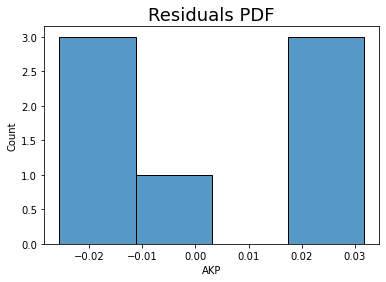

In [24]:
sns.histplot(y_train - predictions)
plt.title("Residuals PDF", size = 18)

# R-Squared

In [25]:
model.score(X_train, y_train)

0.8250056623844855

# Weights and Bias

In [26]:
model.intercept_

0.4366373003024009

In [27]:
model.coef_

array([-0.034512  ,  0.00768072,  0.01065699, -0.02260083])

In [44]:
X_scaled

array([[ 2.65524269,  2.00946283, -2.08124341, -0.54512264],
       [ 0.21693159, -0.18559522, -1.27965082, -0.19962237],
       [-0.04338632, -0.70031873,  0.03863097, -0.54512264],
       [-0.74624468, -0.81007163, -0.1158929 ,  2.01157931],
       [-0.64211751, -0.14568508,  0.29456113, -0.8906229 ],
       [-0.65947204, -0.68858045,  1.27965082, -0.82152285],
       [-0.62476299, -0.68916736,  0.89817001, -0.54512264],
       [ 0.13883622,  1.6244473 ,  0.57946452, -0.06142227],
       [-0.29502697, -0.41449165,  0.38630968,  1.59697899]])

In [43]:
X

,Interest Rate,Average Inflation,GDP,Unemployment
0,0.480000,0.302500,238000000000,0.103000
1,0.199000,0.115500,404000000000,0.108000
2,0.169000,0.071650,677000000000,0.103000
3,0.088000,0.062300,645000000000,0.140000
4,0.100000,0.118900,730000000000,0.098000
5,0.098000,0.072650,934000000000,0.099000
6,0.102000,0.072600,855000000000,0.103000
7,0.190000,0.269700,789000000000,0.110000
8,0.140000,0.096000,749000000000,0.134000


In [28]:
model_summary = pd.DataFrame(X.columns.values, columns = ['Features'])
model_summary ['Weights'] = model.coef_
model_summary

,Features,Weights
0,Interest Rate,-0.034512
1,Average Inflation,0.007681
2,GDP,0.010657
3,Unemployment,-0.022601


# Testing

In [29]:
predictions_test = model.predict(X_test)

In [30]:
predictions_test

array([0.45188625, 0.41859946])

# Measuring the Model's Performance

In [31]:
y_test

7    0.4760
1    0.4167
Name: AKP, dtype: float64

In [32]:
df_pf = pd.DataFrame(predictions_test, columns = ['Predictions'])
df_pf

,Predictions
0,0.451886
1,0.418599


In [33]:
df_pf['Target'] = y_test
df_pf

,Predictions,Target
0,0.451886,NaN
1,0.418599,0.4167


In [34]:
y_test = y_test.reset_index(drop = True)

In [35]:
df_pf['Target'] = y_test

In [36]:
df_pf['Residuals'] = df_pf ['Target'] - df_pf ['Predictions']

In [37]:
df_pf ['Differences %'] = np.absolute(df_pf ['Residuals'] / df_pf['Target']*100)
df_pf

,Predictions,Target,Residuals,Differences %
0,0.451886,0.4760,0.024114,5.065915
1,0.418599,0.4167,-0.001899,0.455833


In [38]:
df_pf.describe(include = 'all')

,Predictions,Target,Residuals,Differences %
count,2.000000,2.000000,2.000000,2.000000
mean,0.435243,0.446350,0.011107,2.760874
std,0.023537,0.041931,0.018394,3.259820
min,0.418599,0.416700,-0.001899,0.455833
25%,0.426921,0.431525,0.004604,1.608354
50%,0.435243,0.446350,0.011107,2.760874
75%,0.443565,0.461175,0.017610,3.913394
max,0.451886,0.476000,0.024114,5.065915


In [39]:
pd.set_option('display.float_format', lambda x: '%2f' % x)
df_pf.sort_values(by = ['Differences %'])

,Predictions,Target,Residuals,Differences %
1,0.418599,0.416700,-0.001899,0.455833
0,0.451886,0.476000,0.024114,5.065915
